<h1 style="color:rgb(0,120,170)">Artificial Intelligence in Life Sciences</h1>
<h2 style="color:rgb(0,120,170)">Handling molecule data</h2>

<b>Authors:</b> Klambauer, Rumetshofer <br>
<b>Date:</b> 17-03-2022

This file is part of the "Artificial Intelligence in Life Sciences" lecture material.
The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational
use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed
or in electronic form, requires explicit prior acceptance of the authors.

<h1 style="color:rgb(0,120,170)">Software</h1>

- [Open Babel:](http://openbabel.org/wiki/Main_Page)
    - Can convert many different file formats
    - Commandline tool, GUIs
    - Calculate 2D, 3D coordinates
    - Some molecular descriptors
- [PaDEL:](http://www.yapcwsoft.com/dd/padeldescriptor/)
    - Java-based
    - Calculates many molecular descriptors
    - Some molecule handling
- [jCompoundMapper:](http://jcompoundmapper.sourceforge.net/)
    - Java-based
    - Calculates molecular descriptors/fingerprints for machine learning methods
- [ChemAxon:](https://chemaxon.com/)
    - Many different applications for molecules
    - Free academic licences
    - Standardization
    - Chemical descriptors / fingerprints
    - Substructure search
- [Chemopy/chempy:](https://academic.oup.com/bioinformatics/article/29/8/1092/233093)
    - Many molecular descriptors
    - Support stopped?
- [RDKit:](http://www.rdkit.org/)
    - Python library for handling molecules
    - Offers many functions
    - Many contributors --> bugs and other problems
    - Many users
    - Standard open source tool
    - See usage below

In [1]:
import os
import pandas as pd
import numpy as np
import copy

import rdkit
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import inchi

from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

from rdkit import RDLogger  
RDLogger.DisableLog('rdApp.*') 

print(rdkit.__version__)

2022.09.4


<h1 style="color:rgb(0,120,170)">The MUTAG dataset</h1>

The MUTAG dataset is as small dataset of over 200 molecules tested for mutagenicity (inducing mutations in DNA). More information about the dataset can be found in this publication: <br>
<i> Debnath, A. K., Lopez de Compadre, R. L., Debnath, G., Shusterman, A. J., & Hansch, C. (1991). Structure-activity relationship of mutagenic aromatic and heteroaromatic nitro compounds. correlation with molecular orbital energies and hydrophobicity. Journal of medicinal chemistry, 34(2), 786-797. </i>

In the following we will load this dataset in **MOL/SDF format** and inspect it in more detail. The main blocks of this data format are depicted below:

<div align="center">
<br>
<img src="resources/sdf_format.gif" width="400"/>
Source: http://www.homepages.ed.ac.uk/jjarvis/research/thesis/node50.html 
</div>

In [2]:
mutag = Chem.SDMolSupplier('resources/mutag.sdf')

In [3]:
# Select one molecule
mol = mutag[0] 

print(Chem.MolToMolBlock(mol))

2-nitrophenanthrene
     RDKit          2D

 17 19  0  0  0  0  0  0  0  0999 V2000
    0.6533    2.4267    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.2133    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6533   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0533   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7533    1.2133    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0533    2.4267    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1533    1.2133    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.8533    2.4267    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1533    3.5933    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7533    3.5933    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.8533   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2533   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0000    1.2133    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.

<h1 style="color:rgb(0,120,170)">Representations</h1>

<h2 style="color:rgb(0,120,170)">Graph representation</h2>

In [4]:
def drawMolecule(mol, bond_idcs=False, atom_idcs=True):
    d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
    d2d.drawOptions().addAtomIndices=atom_idcs
    d2d.drawOptions().addBondIndices=bond_idcs
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    return SVG(d2d.GetDrawingText())

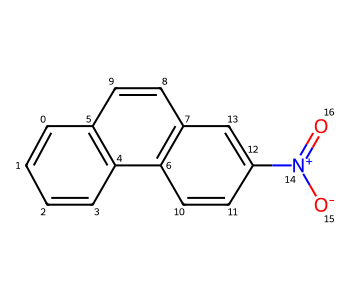

In [5]:
# Print 2D structure with atom indices - might work depending on your rdkit version
# Draw.MolToImage(mol,includeAtomNumbers=True) 

# Print 2D structure with atom indices (starting at 0; contrary to SDF format)
drawMolecule(mol)

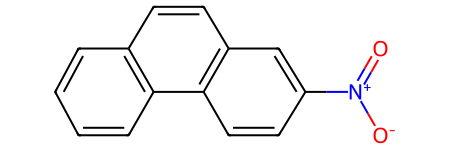

In [8]:
mol

<h2 style="color:rgb(0,120,170)">SMILES (Simplified Molecular Input Line Entry Specification)</h2>

- string representation (not unique)
- single bonds not written, double bonds indicated by =
- rings indicated by numbers
- side chains indicated by brackets

In [9]:
Chem.MolToSmiles(mol)

'O=[N+]([O-])c1ccc2c(ccc3ccccc32)c1'

<h2 style="color:rgb(0,120,170)">InChI (International Chemical Identifier)</h2>

<div align="center">
<br>
<img src="resources/inchi.png" width="800"/>
Source: https://www.inchi-trust.org/technical-faq-2/#2.1 
</div>

In [10]:
Chem.MolToInchi(mol)

'InChI=1S/C14H9NO2/c16-15(17)12-7-8-14-11(9-12)6-5-10-3-1-2-4-13(10)14/h1-9H'

<h2 style="color:rgb(0,120,170)">InChIKey</h2>

- Hashed version of InChI
- Fixed-length of 27 characters

In [11]:
Chem.MolToInchiKey(mol)

'PYZVVHPEDWRKME-UHFFFAOYSA-N'

<h1 style="color:rgb(0,120,170)">Properties</h1>

In [12]:
df = pd.DataFrame('NA', index=range(0,len(mutag)), columns=['Number Atoms', 'Activity', 'Compound Name', 'Display Name'])

for i, mol in enumerate(mutag): 
    if mol is not None:
        n_atoms = mol.GetNumAtoms()
        activity = mol.GetProp('Activity')
        name = mol.GetProp('Compound Name')
        df.loc[i] = [n_atoms, activity, name, "{}_{}".format(name, activity)]

In [13]:
df

,Number Atoms,Activity,Compound Name,Display Name
0,17,2.11,2-nitrophenanthrene,2-nitrophenanthrene_2.11
1,13,-1.24,8-nitroquinoline,8-nitroquinoline_-1.24
2,13,-0.96,5-nitroquinoline,5-nitroquinoline_-0.96
3,19,2.74,1-nitrofluoranthene,1-nitrofluoranthene_2.74
4,11,-0.79,"2,5-difluoronitrobenzene","2,5-difluoronitrobenzene_-0.79"
...,...,...,...,...
225,12,1.97,5-nitro-2-furanacrolein,5-nitro-2-furanacrolein_1.97
226,14,1.02,nitrofurazone,nitrofurazone_1.02
227,17,1.03,nitrofurantoin,nitrofurantoin_1.03
228,14,2.59,niridazole,niridazole_2.59


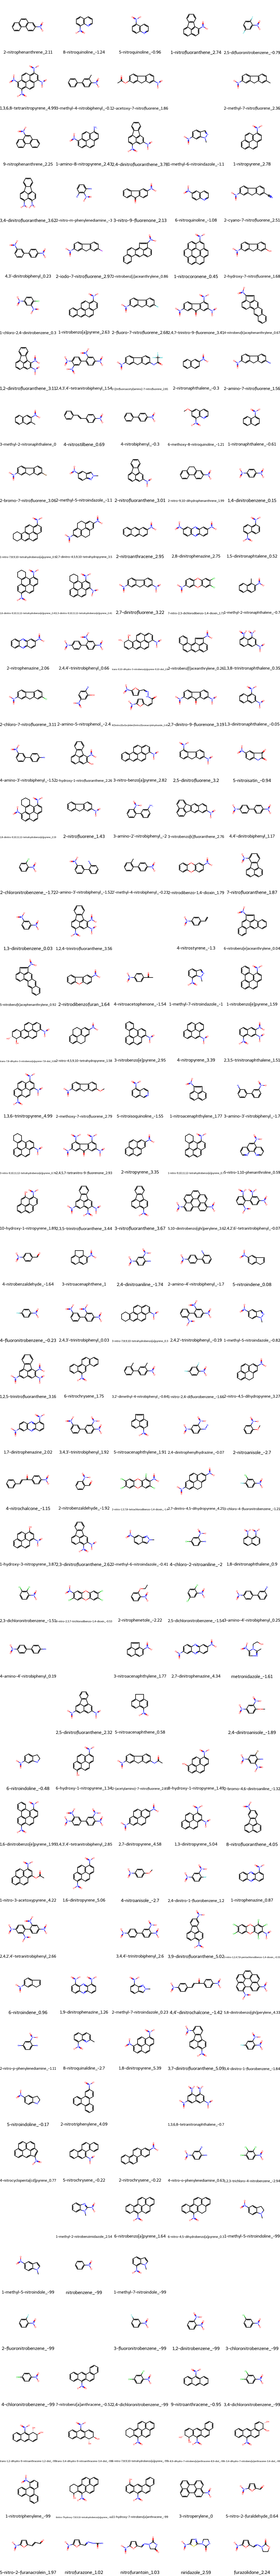

In [14]:
Draw._MolsToGridImage(mutag,legends=df["Display Name"].values.tolist(), molsPerRow=4)

<h2 style="color:rgb(0,120,170)">Atom, bond and ring information</h2>

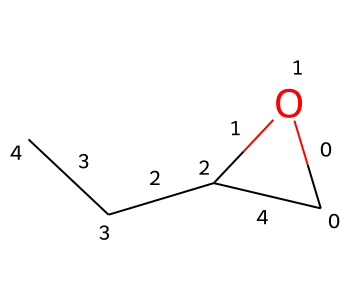

In [13]:
m = Chem.MolFromSmiles('C1OC1CC')

# Print 2D structure with atom indices and bond indices
drawMolecule(m, bond_idcs=True)

In [14]:
# Print atomic numbers of atoms in perodic system
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

6
8
6
6
6


In [15]:
# Get bond type for bond 0
print(m.GetBonds()[0].GetBondType())

SINGLE


In [16]:
# Check wheter atom 0 is in a ring 
m.GetAtomWithIdx(0).IsInRing()

True

In [17]:
# Check wheter atom 3 is in a ring 
m.GetAtomWithIdx(3).IsInRing()

False

In [18]:
# Check wheter atom 0 is in a ring of size 3
m.GetAtomWithIdx(0).IsInRingSize(3)

True

In [19]:
# Check wheter atom 0 is in a ring of size 4
m.GetAtomWithIdx(0).IsInRingSize(4)

False

<h2 style="color:rgb(0,120,170)">Modifying molecules</h2>

Normally molecules are stored in the RDKit with the hydrogen atoms implicit (e.g. not explicitly present in the molecular graph. It is useful to have the hydrogens explicitly present, for example when generating or optimizing the 3D geometry.

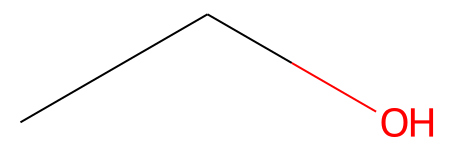

In [20]:
m = Chem.MolFromSmiles('CCO')
m

In [21]:
m.GetNumAtoms()

3

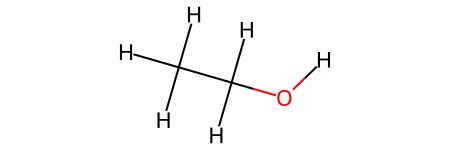

In [22]:
# Adds hydrogens to the graph of the molecule
m2 = Chem.AddHs(m)
m2

In [23]:
m2.GetNumAtoms()

9

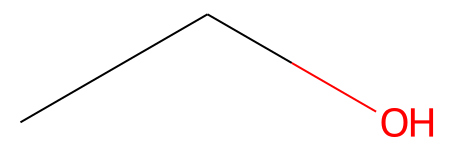

In [24]:
# Returns a copy of the molecule with all Hs removed
m3 = Chem.RemoveHs(m2)
m3

In [25]:
m3.GetNumAtoms()

3

<h2 style="color:rgb(0,120,170)">Aromatic bonds</h2>

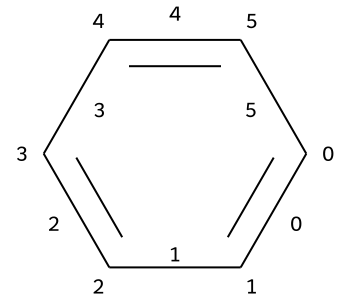

In [26]:
m = Chem.MolFromSmiles('c1ccccc1')
# Print 2D structure with atom indices and bond indices
drawMolecule(m, bond_idcs=True)

In [27]:
# Get bond type for bond 0
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [28]:
# Remove aromatic bond information
Chem.Kekulize(m)

In [29]:
# Get bond type for bond 0
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [30]:
# Get bond type for bond 1
m.GetBondWithIdx(1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [31]:
# Resets aromaticity (amongst other things)
Chem.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [32]:
# Get bond type for bond 0
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

<h2 style="color:rgb(0,120,170)">Substructure matching</h2>

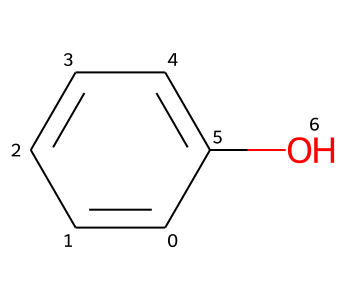

In [33]:
m = Chem.MolFromSmiles('c1ccccc1O')

# Print 2D structure with atom indices 
drawMolecule(m)

In [34]:
# Check wheter molecule contains substructure 
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [35]:
# Get atom indices of substructure
m.GetSubstructMatch(patt)

(0, 5, 6)

In [36]:
# Check for molecules that contain Fluorine
patt = Chem.MolFromSmarts('F')
matches = []
for mol in mutag:
    if mol is not None and mol.HasSubstructMatch(patt):
        matches.append(mol)

In [37]:
matches

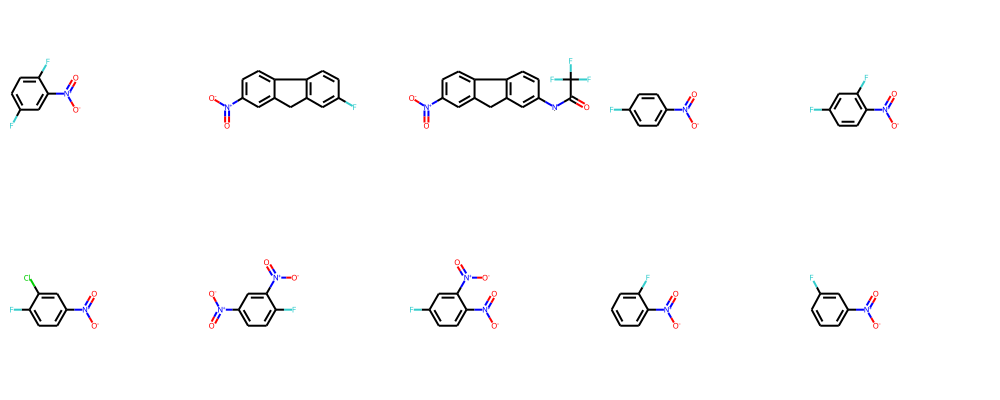

In [38]:
Draw._MolsToGridImage(matches,molsPerRow=5)

<h1 style="color:rgb(0,120,170)">Molecular descriptors</h1>

<h2 style="color:rgb(0,120,170)">RDKIT Descriptors</h2>

In [39]:
# Define descriptors that should be calculated (we select all available)
descriptor_list = Chem.Descriptors._descList
names = [desc[0] for desc in descriptor_list]
MolDescCalc = MoleculeDescriptors.MolecularDescriptorCalculator(names)

In [40]:
# Initialize variables
desc_mtx = np.zeros((len(mutag), len(names))) * np.nan
compounds = [''] * len(mutag)

# Calculate descriptors
for i, mol in enumerate(mutag): 
    if mol is not None:
        compounds[i] = mol.GetProp('_Name')
        desc_mtx[i] = MolDescCalc.CalcDescriptors(mol)

In [41]:
rdkit_desc = pd.DataFrame(desc_mtx, index = compounds, columns=names)
rdkit_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
2-nitrophenanthrene,10.713762,-0.366438,10.713762,0.132205,0.356442,223.231,214.159,223.063329,82.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8-nitroquinoline,10.580467,-0.421296,10.580467,0.053796,0.491211,174.159,168.111,174.042927,64.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-nitroquinoline,10.592689,-0.398796,10.592689,0.102407,0.491211,174.159,168.111,174.042927,64.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-nitrofluoranthene,11.262839,-0.297963,11.262839,0.185093,0.369424,247.253,238.181,247.063329,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2,5-difluoronitrobenzene",12.412037,-1.031111,12.412037,0.537037,0.463316,159.091,156.067,159.013185,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5-nitro-2-furanacrolein,10.106231,-0.640625,10.106231,0.285926,0.294905,167.120,162.080,167.021858,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nitrofurazone,10.146041,-1.456198,10.146041,0.057130,0.390841,195.114,192.090,195.015430,71.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
nitrofurantoin,11.005221,-0.771013,11.005221,0.100786,0.318916,237.151,232.111,237.025994,87.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
niridazole,11.109911,-0.528912,11.109911,0.069722,0.530806,213.198,208.158,213.008236,73.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
# List of available descriptions for the descriptors
MolDescCalc.GetDescriptorSummaries()

['N/A',
 'N/A',
 'N/A',
 'N/A',
 'Calculate the weighted sum of ADS mapped properties',
 'The average molecular weight of the molecule',
 'The average molecular weight of the molecule ignoring hydrogens',
 'The exact molecular weight of the molecule',
 'The number of valence electrons the molecule has',
 'The number of radical electrons the molecule has (says nothing about spin state)',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 "Calculate Balaban's J value for a molecule",
 'A topological index meant to quantify "complexity" of molecules.',
 'From equations (1),(9) and (10) of Rev. Comp. Chem. vol 2, 367-422, (1991)',
 'N/A',
 'N/A',
 'From equations (1),(11) and (12) of Rev. Comp. Chem. vol 2, 367-422, (1991)',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'This returns the information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrog

<h2 style="color:rgb(0,120,170)">Morgan Fingerprints</h2>

In [43]:
# Initialize variables
fp_length = 1024
desc_mtx = np.zeros((len(mutag), fp_length)) * np.nan
compounds = [''] * len(mutag)

# Calculate Morgan fingerprints (equivalent to ECFP fingerprints)
for i, mol in enumerate(mutag): 
    if mol is not None:
        compounds[i] = mol.GetProp('_Name')
        desc_mtx[i] = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=fp_length)

In [44]:
rdkit_fps = pd.DataFrame(desc_mtx, index=compounds)
rdkit_fps

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
2-nitrophenanthrene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8-nitroquinoline,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-nitroquinoline,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-nitrofluoranthene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"2,5-difluoronitrobenzene",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5-nitro-2-furanacrolein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nitrofurazone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
nitrofurantoin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
niridazole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Calculate sum over columns -- features are very sparse 
pd.set_option('display.min_rows', 20)
pd.DataFrame(np.sum(rdkit_fps > 0,axis=0))

,0
0,5
1,2
2,18
3,3
4,9
5,3
6,2
7,5
8,8
9,2
